#1. IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt


#2. LOAD DATA

In [ ]:
#Load data

main_df = pd.read_excel('/content/Gyalpozhing_household_power_consumption.XLSX')
main_df.head()

BP Number                                          BP_name   CA_number  \
0  1702371.0            Company Lemon Grass Factory Kurizampa  50000504.0   
1  1705727.0                          Company RBA Gyelposhing  50001004.0   
2  1702588.0                              N R D C Gyelposhing  60001500.0   
3  1702586.0                          Swerage Treatment Plant  60000307.0   
4  1709983.0  Company Rabsel Construction Pvt.Ltd Gyelposhing  60006107.0   

  portion posting_Date   Due Date Billing Period  Print Doc. No.  \
0  P17_41   2019-01-02 2019-02-01        2019/01    6.007099e+09   
1  P17_41   2019-01-02 2019-02-01        2019/01    4.003612e+09   
2  P17_41   2019-01-02 2019-02-01        2019/01    6.007099e+09   
3  P17_41   2019-01-02 2019-02-01        2019/01    6.007099e+09   
4  P17_41   2019-01-02 2019-02-01        2019/01    6.007099e+09   

   Billing Doc. No.  consumption  ...    current  voltage  energy_Charges  \
0      9.018221e+09        167.0  ...   1.166136    234.0          589.51   
1      9.018221e+09        788.0  ...   5.502486    234.0         2781.64   
2      9.018221e+09          0.0  ...   0.000000    234.0            0.00   
3      9.018221e+09          0.0  ...   0.000000    234.0            0.00   
4      9.018221e+09       1880.0  ...  13.127758    234.0         7557.60   

   Demand Charges  Penalty Charges     Recon Key G/L Account         Category  \
0             0.0             0.00  19015R040045      300002  LV Agricultural   
1             0.0             0.00   190115R4/17      300002  LV Agricultural   
2             0.0             0.00  19015R040045         NaN          LV Bulk   
3             0.0             0.00  19015R040045         NaN          LV Bulk   
4             0.0           463.18  19015R040045      300003          LV Bulk   

  FICA Doument no         Search term1  
0    4.000049e+11        LEMON FACTORY  
1    9.434803e+07    RAMS, GYELPOSHING  
2    4.000049e+11              N R D C  
3    4.000049e+11        SWERAGE PLANT  
4    4.000049e+11  RABSEL CONSTRUCTION  

[5 rows x 21 columns]

# 3. DATA PREPROCESSING 

In [ ]:
# Creating a new dataframe with the only required attributes:

df = pd.DataFrame(main_df,columns=['CA_number','BP_name','Category','portion','posting_Date','current','voltage','power','consumption','energy_Charges'])
df.tail()

CA_number                                            BP_name  \
25377   40067090.0                                   gyeltshap office   
25378  140005001.0  Company KHPC,Dam Repair Stilling Bagin & Glaci...   
25379   60010803.0     EV Charging Station GCIT Forign Lectural Villa   
25380          NaN                                                NaN   
25381          NaN                                                NaN   

                          Category portion posting_Date     current  voltage  \
25377  LV Urban Domestic Customers  P17_40   2022-03-02    3.505391    234.0   
25378                MV Industrial  P17_41   2022-03-02  830.316742    234.0   
25379                      LV Bulk  P17_41   2022-03-16    0.000000    234.0   
25380                          NaN     NaN          NaT         NaN      NaN   
25381                          NaN     NaN          NaT         NaN      NaN   

            power  consumption  energy_Charges  
25377    0.697222        502.0         1207.28  
25378  165.150000     118908.0       315106.20  
25379    0.000000          0.0            0.00  
25380         NaN          NaN             NaN  
25381         NaN          NaN             NaN

In [ ]:
df.isna().sum()

CA_number         2
BP_name           2
Category          2
portion           2
posting_Date      2
current           2
voltage           2
power             2
consumption       2
energy_Charges    2
dtype: int64

In [ ]:
df = df.dropna()
df.isna().sum()

CA_number         0
BP_name           0
Category          0
portion           0
posting_Date      0
current           0
voltage           0
power             0
consumption       0
energy_Charges    0
dtype: int64

In [ ]:
# Selecting the data from 2019 till 2021 only:

df = df.loc[(df['posting_Date'] >= '01-01-2019') & (df['posting_Date'] < '01-01-2022')]
df.tail()

CA_number                                    BP_name  \
23602  30077784.0                        Mr. Tshering Peldon   
23603  40021115.0                        Mr. Chedup Resident   
23604  40036288.0                            Ms. Tashi Choki   
23605  40021151.0                               Mr. Chedup .   
23606  40061822.0  Company BHU Staffs Quarter -3 Gyelposhing   

                          Category portion posting_Date   current  voltage  \
23602  LV Urban Domestic Customers  P17_41   2021-12-02  0.796045    234.0   
23603  LV Urban Domestic Customers  P17_41   2021-12-02  1.529244    234.0   
23604  LV Urban Domestic Customers  P17_41   2021-12-02  0.628457    234.0   
23605  LV Urban Domestic Customers  P17_41   2021-12-02  0.733199    234.0   
23606  LV Urban Domestic Customers  P17_41   2021-12-02  0.279314    234.0   

          power  consumption  energy_Charges  
23602  0.158333        114.0          165.52  
23603  0.304167        219.0          446.92  
23604  0.125000         90.0          115.20  
23605  0.145833        105.0          141.40  
23606  0.055556         40.0           51.20

In [ ]:
# Extracting the year and montht from the posting_date
# Adding these two new columns(Year and month) and then droping the posting date col

df['Year'] = pd.to_datetime(df['posting_Date']).dt.year
df['Month'] = pd.to_datetime(df['posting_Date']).dt.month
df = df.drop(['posting_Date'], axis = 1)

In [ ]:
df.dtypes

CA_number         float64
BP_name            object
Category           object
portion            object
current           float64
voltage           float64
power             float64
consumption       float64
energy_Charges    float64
Year                int64
Month               int64
dtype: object

In [ ]:
df['CA_number'] = df['CA_number'].astype(int)

In [ ]:
df

CA_number                                          BP_name  \
0       50000504            Company Lemon Grass Factory Kurizampa   
1       50001004                          Company RBA Gyelposhing   
2       60001500                              N R D C Gyelposhing   
3       60000307                          Swerage Treatment Plant   
4       60006107  Company Rabsel Construction Pvt.Ltd Gyelposhing   
...          ...                                              ...   
23602   30077784                              Mr. Tshering Peldon   
23603   40021115                              Mr. Chedup Resident   
23604   40036288                                  Ms. Tashi Choki   
23605   40021151                                     Mr. Chedup .   
23606   40061822        Company BHU Staffs Quarter -3 Gyelposhing   

                          Category portion    current  voltage     power  \
0                  LV Agricultural  P17_41   1.166136    234.0  0.231944   
1                  LV Agricultural  P17_41   5.502486    234.0  1.094444   
2                          LV Bulk  P17_41   0.000000    234.0  0.000000   
3                          LV Bulk  P17_41   0.000000    234.0  0.000000   
4                          LV Bulk  P17_41  13.127758    234.0  2.611111   
...                            ...     ...        ...      ...       ...   
23602  LV Urban Domestic Customers  P17_41   0.796045    234.0  0.158333   
23603  LV Urban Domestic Customers  P17_41   1.529244    234.0  0.304167   
23604  LV Urban Domestic Customers  P17_41   0.628457    234.0  0.125000   
23605  LV Urban Domestic Customers  P17_41   0.733199    234.0  0.145833   
23606  LV Urban Domestic Customers  P17_41   0.279314    234.0  0.055556   

       consumption  energy_Charges  Year  Month  
0            167.0          589.51  2019      1  
1            788.0         2781.64  2019      1  
2              0.0            0.00  2019      1  
3              0.0            0.00  2019      1  
4           1880.0         7557.60  2019      1  
...            ...             ...   ...    ...  
23602        114.0          165.52  2021     12  
23603        219.0          446.92  2021     12  
23604         90.0          115.20  2021     12  
23605        105.0          141.40  2021     12  
23606         40.0           51.20  2021     12  

[23607 rows x 11 columns]

In [ ]:
df.isna().sum()

CA_number         0
BP_name           0
Category          0
portion           0
current           0
voltage           0
power             0
consumption       0
energy_Charges    0
Year              0
Month             0
dtype: int64

In [ ]:
gyalpozhing_df = df.drop_duplicates()

In [ ]:
df.shape

(23607, 11)

# 4. DETECTING OUTLIERS

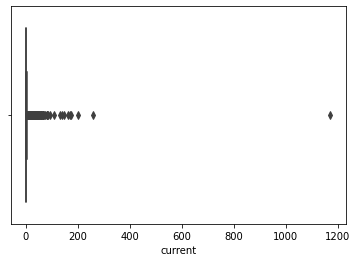

In [ ]:
sns.boxplot(x = gyalpozhing_df['current'])
plt.show()

In [ ]:
#ul = upper limit
#ll = lower limit
#IQR = Interquartile Range

q1 = gyalpozhing_df.current.quantile(0.25)
q3 = gyalpozhing_df.current.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [ ]:
gyalpozhing_df[(gyalpozhing_df.current < ll)  | (gyalpozhing_df.current > ul)]

CA_number                                            BP_name  \
1       50001004                            Company RBA Gyelposhing   
4       60006107    Company Rabsel Construction Pvt.Ltd Gyelposhing   
5       60006105  Company Gyelposhing AstroTurf Foodball Ground ...   
7       60000306                        Company KCT Block AGGREGATE   
8       60000305                                  Collage Adm Block   
...          ...                                                ...   
23523   40058650      Company President Quater, Gyelposhing College   
23537   70004786                                    Mr. Sonam Yeshi   
23583   40085315  Company HRH Gyaltshab Staff Qtr-A6 Gyelpozhing...   
23584   40085314  Company HRH Gyaltshab Staff Qtr-A5 Gyelpozhing...   
23590  130001550                        Maja Thang Gyaltshab Office   

                          Category portion    current  voltage     power  \
1                  LV Agricultural  P17_41   5.502486    234.0  1.094444   
4                          LV Bulk  P17_41  13.127758    234.0  2.611111   
5                          LV Bulk  P17_41  48.600637    234.0  9.666667   
7                          LV Bulk  P17_41   7.262164    234.0  1.444444   
8                          LV Bulk  P17_41  10.048321    234.0  1.998611   
...                            ...     ...        ...      ...       ...   
23523  LV Urban Domestic Customers  P17_41   5.816714    234.0  1.156944   
23537  LV Urban Domestic Customers  P17_41   3.233060    234.0  0.643056   
23583  LV Urban Domestic Customers  P17_41   7.422770    234.0  1.476389   
23584  LV Urban Domestic Customers  P17_41   8.100106    234.0  1.611111   
23590  LV Urban Domestic Customers  P17_41   5.851628    234.0  1.163889   

       consumption  energy_Charges  Year  Month  
1            788.0         2781.64  2019      1  
4           1880.0         7557.60  2019      1  
5           6960.0        27979.20  2019      1  
7           1040.0         4180.80  2019      1  
8           1439.0         5784.78  2019      1  
...            ...             ...   ...    ...  
23523        833.0         2412.12  2021     12  
23537        463.0         1100.84  2021     12  
23583       1063.0         3249.32  2021     12  
23584       1160.0         3602.40  2021     12  
23590        838.0         2430.32  2021     12  

[1956 rows x 11 columns]

In [ ]:
df1 = gyalpozhing_df[(gyalpozhing_df.current > ll) & (gyalpozhing_df.current < ul)]
df1.shape

(21646, 11)

<function matplotlib.pyplot.show>

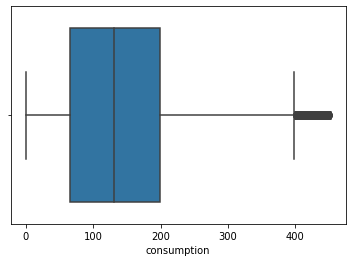

In [ ]:
sns.boxplot(x = df1['consumption'])
plt.show

In [ ]:
q1 = df1.consumption.quantile(0.25)
q3 = df1.consumption.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [ ]:
df1[(df1.consumption < ll)  | (df1.consumption > ul)]

CA_number                                            BP_name  \
15      70019802                                  Mr. Sangay Tenzin   
25      70004740                               Ms. Tshering Yangdon   
31      40021057                                     Mr. Pema Lhamo   
41      70004766                                        Mr. Dorji .   
45      70004777                                    Mr. Tashi Choki   
...          ...                                                ...   
23163  130018748          Mr. Bhutan Construction,PVT.LTD,Thimphu .   
23298   40067757          Company Choney Dorji I Upper Coloney KHPC   
23306   40067751        Company Tshonglay Dendup Upper Coloney KHPC   
23316  120000303                        Company Rbp NCO's Residence   
23407   40085313  Company HRH Gyaltshab Staff Qtr-A4 Gyelpozhing...   

                          Category portion   current  voltage     power  \
15                   LV Commercial  P17_41  3.037540    234.0  0.604167   
25                   LV Commercial  P17_41  2.953746    234.0  0.587500   
31                   LV Commercial  P17_41  2.918831    234.0  0.580556   
41                   LV Commercial  P17_41  2.890900    234.0  0.575000   
45                   LV Commercial  P17_41  2.800123    234.0  0.556944   
...                            ...     ...       ...      ...       ...   
23163                 LV Temporary  P17_41  3.100385    234.0  0.616667   
23298  LV Urban Domestic Customers  P17_40  2.807106    234.0  0.558333   
23306  LV Urban Domestic Customers  P17_40  3.079437    234.0  0.612500   
23316  LV Urban Domestic Customers  P17_41  2.925814    234.0  0.581944   
23407  LV Urban Domestic Customers  P17_41  2.807106    234.0  0.558333   

       consumption  energy_Charges  Year  Month  
15           435.0         1535.55  2019      1  
25           423.0         1493.19  2019      1  
31           418.0         1475.54  2019      1  
41           414.0         1461.42  2019      1  
45           401.0         1415.53  2019      1  
...            ...             ...   ...    ...  
23163        444.0         1616.16  2021     12  
23298        402.0          937.36  2021     12  
23306        441.0         1041.88  2021     12  
23316        419.0          982.92  2021     12  
23407        402.0          937.36  2021     12  

[343 rows x 11 columns]

In [ ]:
df2 = df1[(df1.consumption > ll) & (df1.consumption < ul)]
df2.shape

(21303, 11)

<function matplotlib.pyplot.show>

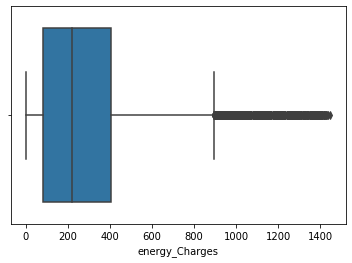

In [ ]:
sns.boxplot(x = df2['energy_Charges'])
plt.show

In [ ]:
q1 = df2.energy_Charges.quantile(0.25)
q3 = df2.energy_Charges.quantile(0.75)
IQR = q3 - q1
ul = q3 + (IQR * 1.5)
ll = q1 - (IQR * 1.5)

In [ ]:
df2[(df2.energy_Charges < ll)  | (df2.energy_Charges > ul)]

CA_number                                            BP_name  \
13      40036882                                 Ms. Rinchen Zangmo   
30      40021052                                    Ms. Sangay Dema   
50      40021095                                Mr. Kinzang Penjore   
55      70004780                                       Ms. Seldon .   
63      40021109                                       Ms. Choden .   
...          ...                                                ...   
23102  100002398                   Company Range Office Gyelposhing   
23113  130019467                                     Ms. Adm. Block   
23150  130019845        Mr. Kharsa Constraction Pvt Ltd Gyelposhing   
23151  130030482  Company Hope-Gyelposhing Project Forcign facul...   
23154  130036301      Ms. Passnag Construction Pvt.Ltd. Gyelpozhing   

               Category portion   current  voltage     power  consumption  \
13        LV Commercial  P17_41  1.871404    234.0  0.372222        268.0   
30        LV Commercial  P17_41  1.913301    234.0  0.380556        274.0   
50        LV Commercial  P17_41  1.885370    234.0  0.375000        270.0   
55        LV Commercial  P17_41  2.115804    234.0  0.420833        303.0   
63        LV Commercial  P17_41  2.325289    234.0  0.462500        333.0   
...                 ...     ...       ...      ...       ...          ...   
23102  LV Institutional  P17_41  1.927267    234.0  0.383333        276.0   
23113  LV Institutional  P17_41  2.590637    234.0  0.515278        371.0   
23150      LV Temporary  P17_41  2.234512    234.0  0.444444        320.0   
23151      LV Temporary  P17_41  2.667449    234.0  0.530556        382.0   
23154      LV Temporary  P17_41  2.430032    234.0  0.483333        348.0   

       energy_Charges  Year  Month  
13             946.04  2019      1  
30             967.22  2019      1  
50             953.10  2019      1  
55            1069.59  2019      1  
63            1175.49  2019      1  
...               ...   ...    ...  
23102         1004.64  2021     12  
23113         1350.44  2021     12  
23150         1164.80  2021     12  
23151         1390.48  2021     12  
23154         1266.72  2021     12  

[705 rows x 11 columns]

In [ ]:
df3 = df2[(df2.energy_Charges > ll) & (df2.energy_Charges < ul)]
df3.shape

(20598, 11)

# 5.  EDA and VISUALIZATION

Text(0.5, 1.0, 'Yearly Change of Consumption')

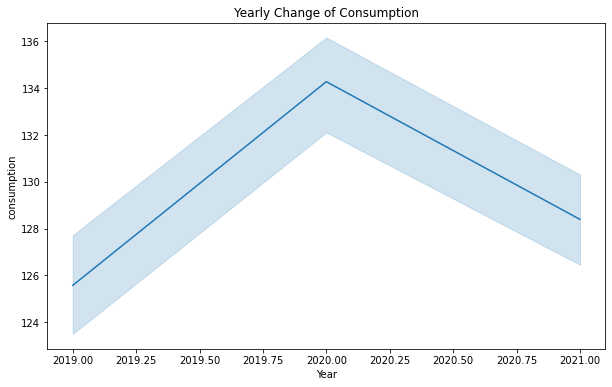

In [ ]:
#yearly change of Consumption

plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="consumption",data=df3)
plt.title("Yearly Change of Consumption")

Text(0.5, 1.0, 'Yearly Change of Consumption')

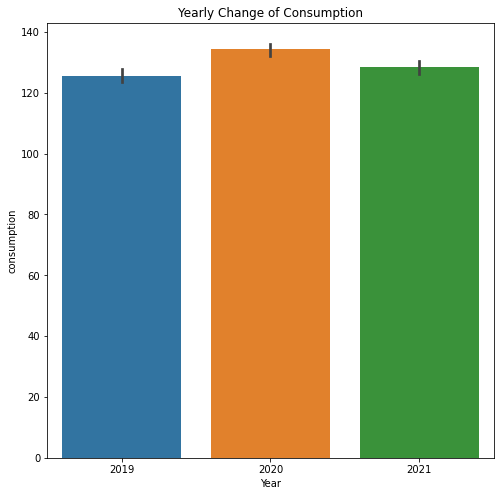

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x="Year", y="consumption",data=df3)
plt.title("Yearly Change of Consumption")

Text(0.5, 1.0, 'Yearly Change of Energy_Charges')

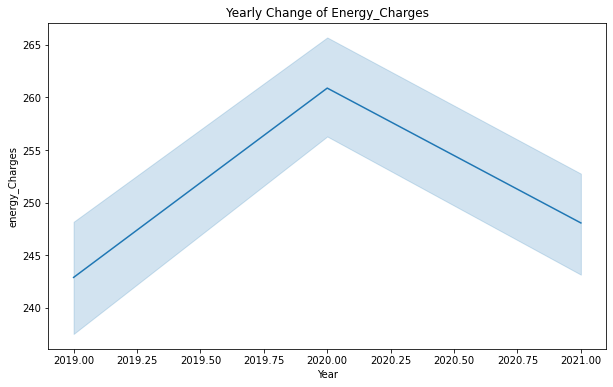

In [ ]:
#yearly change of Energy_Charges
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="energy_Charges",data=df3)
plt.title("Yearly Change of Energy_Charges")

Text(0.5, 1.0, 'Yearly Change of Energy_Charges')

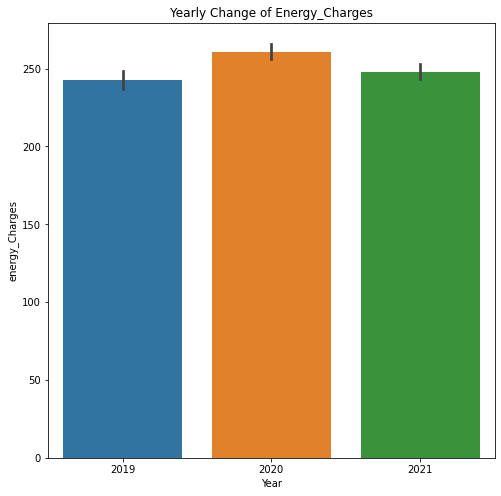

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x="Year", y="energy_Charges",data=df3)
plt.title("Yearly Change of Energy_Charges")

Text(0.5, 1.0, 'Change in Consumption with respect to Current')

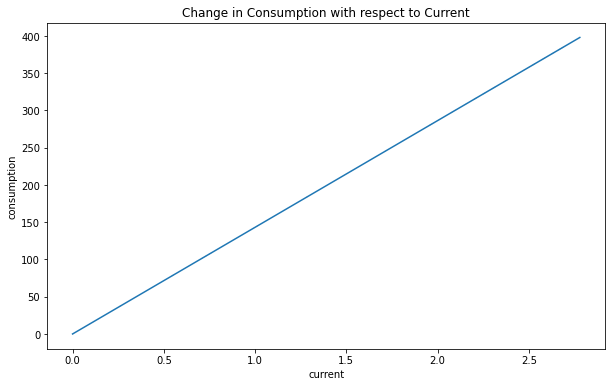

In [ ]:
# Change in Consumption with respect to Current
plt.figure(figsize=(10,6))
sns.lineplot(x="current", y="consumption",data=df3)
plt.title("Change in Consumption with respect to Current")

Text(0.5, 1.0, 'Change in Consumption with respect to Current')

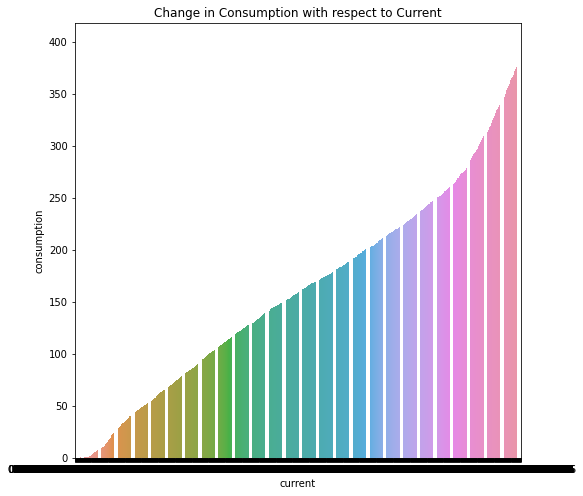

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x="current", y="consumption",data=df3)
plt.title("Change in Consumption with respect to Current")

Text(0.5, 1.0, 'Power Consumption of each Category')

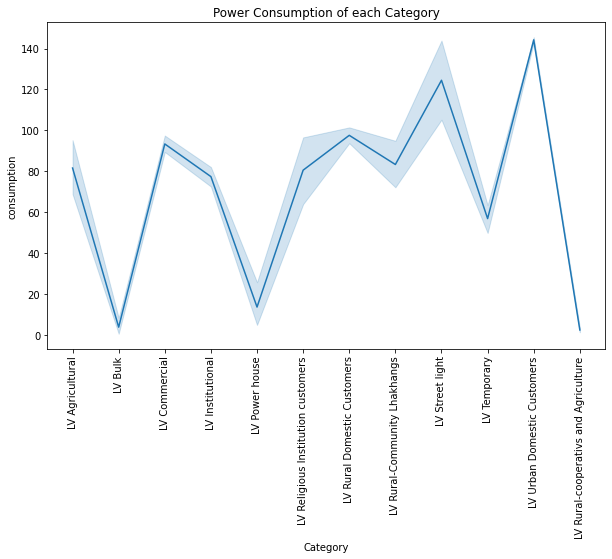

In [ ]:
# Power Consumption of each Category

plt.figure(figsize=(10,6))
sns.lineplot(x="Category", y="consumption",data=df3)
plt.xticks(rotation= '90')
plt.title("Power Consumption of each Category")

Text(0.5, 1.0, 'Power Consumption of each Category')

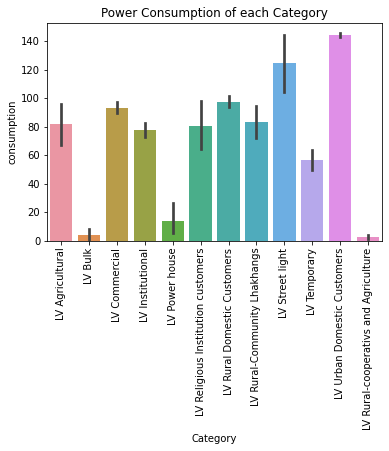

In [ ]:
# plt.figure(figsize=(8,8))
sns.barplot(x="Category", y="consumption",data=df3)
plt.xticks(rotation= '90')
plt.title("Power Consumption of each Category")

Text(0.5, 1.0, 'Power Consumption of each Portion')

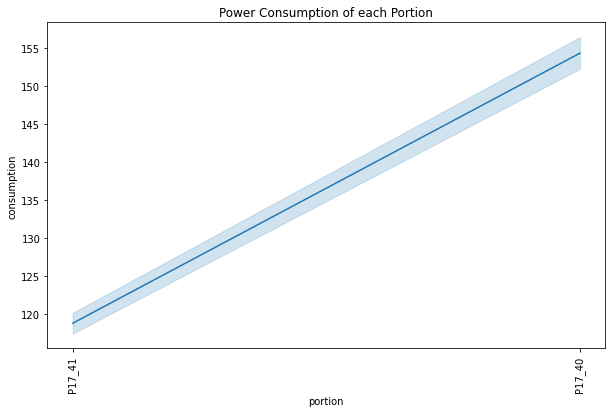

In [ ]:
# Power Consumption in each Portion

plt.figure(figsize=(10,6))
sns.lineplot(x="portion", y="consumption",data=df3)
plt.xticks(rotation= '90')
plt.title("Power Consumption of each Portion")

Text(0.5, 1.0, 'Power Consumption of each Portion')

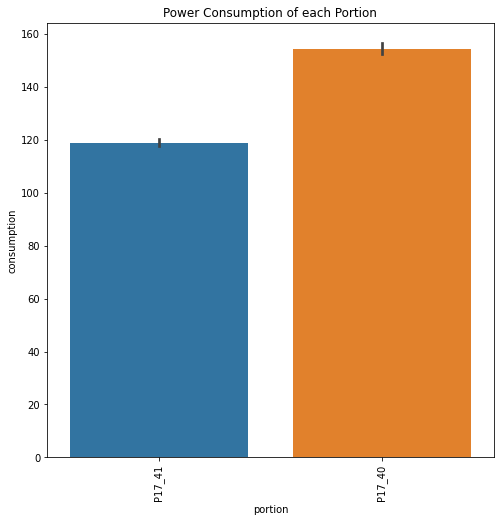

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(x="portion", y="consumption",data=df3)
plt.xticks(rotation= '90')
plt.title("Power Consumption of each Portion")

Text(0.5, 1.0, 'Monthly Power Consumption ')

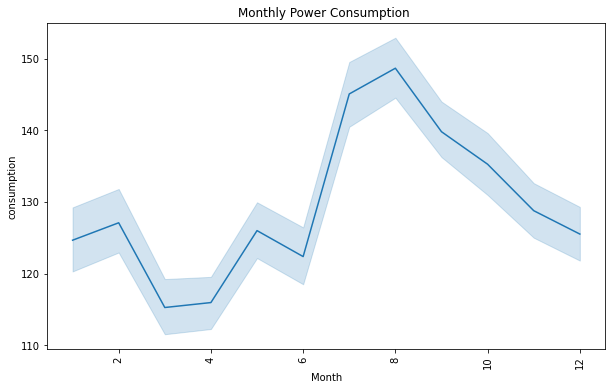

In [ ]:
# Monthly Power Consumption 

plt.figure(figsize=(10,6))
sns.lineplot(x="Month", y="consumption",data=df3)
plt.xticks(rotation= '90')
plt.title("Monthly Power Consumption ")

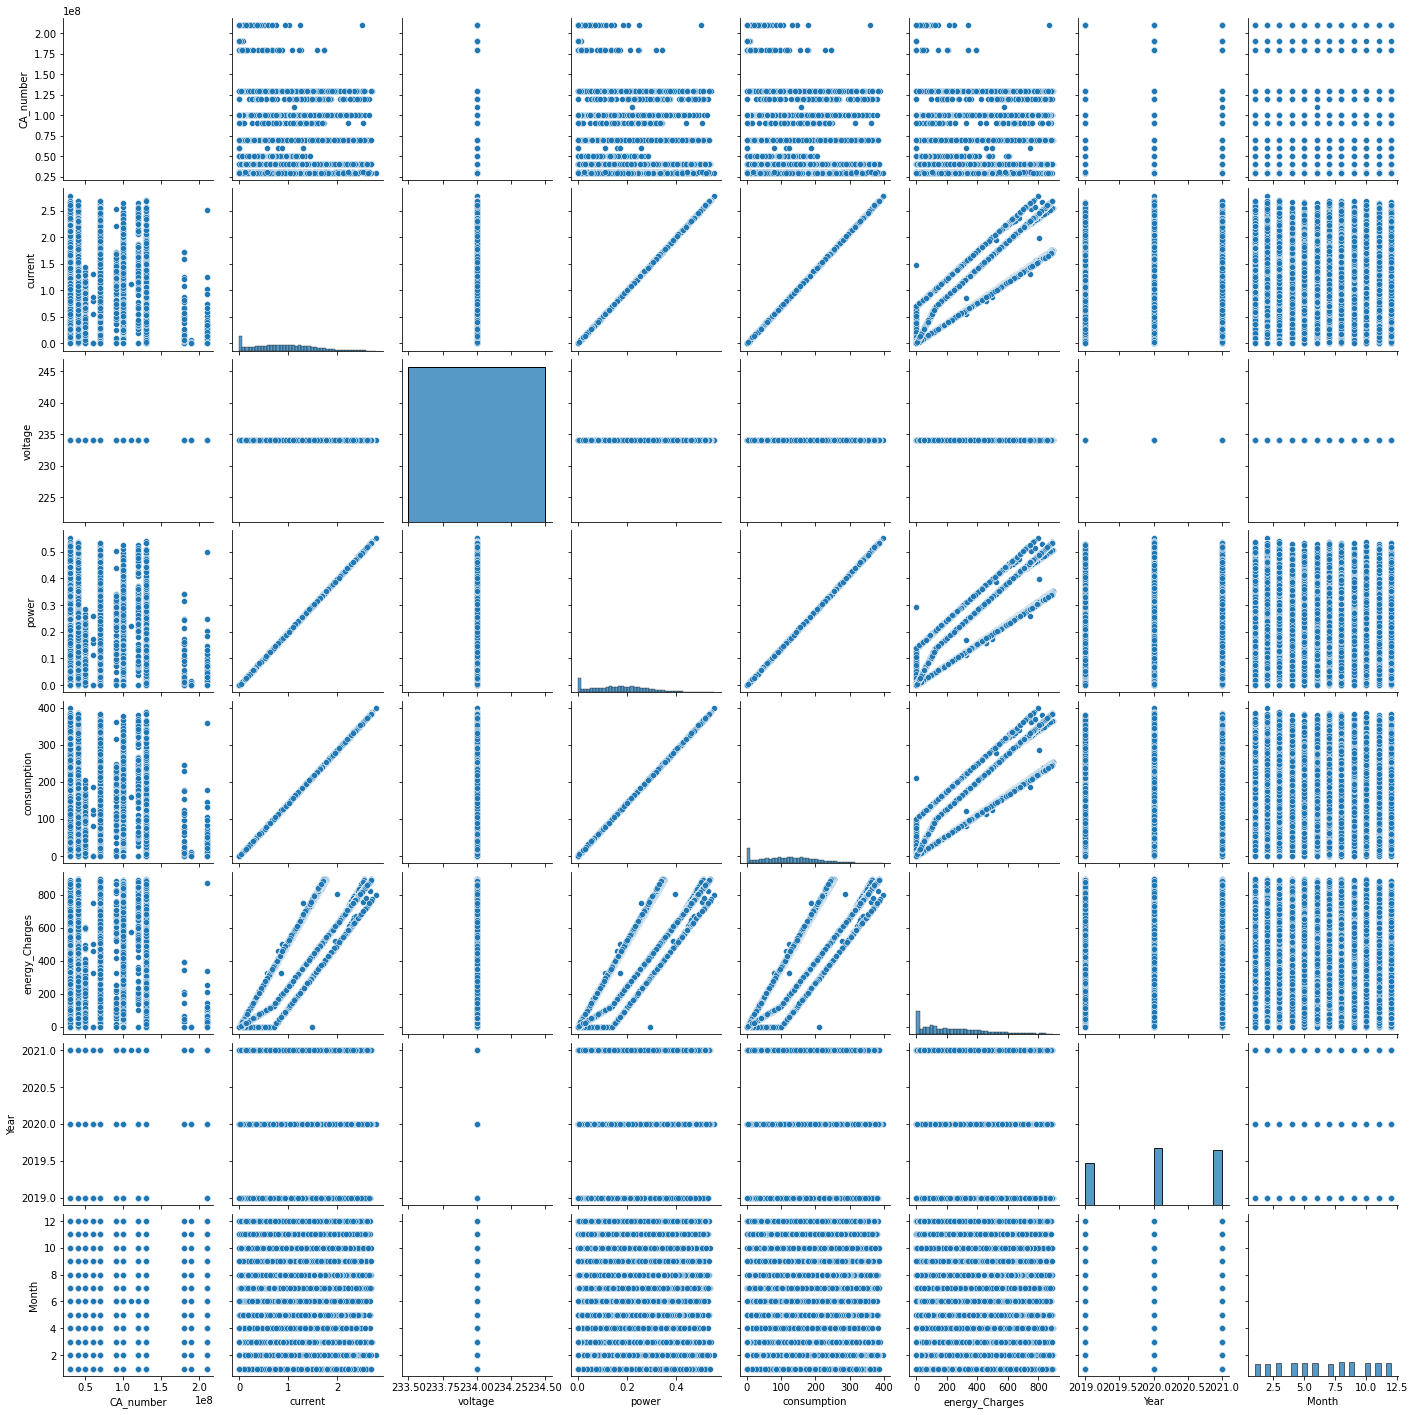

In [ ]:
 sns.pairplot(df3)
 plt.show()

# 6. LABEL ENCODING

In [ ]:
df3.tail()

CA_number                                    BP_name  \
23602   30077784                        Mr. Tshering Peldon   
23603   40021115                        Mr. Chedup Resident   
23604   40036288                            Ms. Tashi Choki   
23605   40021151                               Mr. Chedup .   
23606   40061822  Company BHU Staffs Quarter -3 Gyelposhing   

                          Category portion   current  voltage     power  \
23602  LV Urban Domestic Customers  P17_41  0.796045    234.0  0.158333   
23603  LV Urban Domestic Customers  P17_41  1.529244    234.0  0.304167   
23604  LV Urban Domestic Customers  P17_41  0.628457    234.0  0.125000   
23605  LV Urban Domestic Customers  P17_41  0.733199    234.0  0.145833   
23606  LV Urban Domestic Customers  P17_41  0.279314    234.0  0.055556   

       consumption  energy_Charges  Year  Month  
23602        114.0          165.52  2021     12  
23603        219.0          446.92  2021     12  
23604         90.0          115.20  2021     12  
23605        105.0          141.40  2021     12  
23606         40.0           51.20  2021     12

In [ ]:
df

CA_number                                          BP_name  \
0       50000504            Company Lemon Grass Factory Kurizampa   
1       50001004                          Company RBA Gyelposhing   
2       60001500                              N R D C Gyelposhing   
3       60000307                          Swerage Treatment Plant   
4       60006107  Company Rabsel Construction Pvt.Ltd Gyelposhing   
...          ...                                              ...   
23602   30077784                              Mr. Tshering Peldon   
23603   40021115                              Mr. Chedup Resident   
23604   40036288                                  Ms. Tashi Choki   
23605   40021151                                     Mr. Chedup .   
23606   40061822        Company BHU Staffs Quarter -3 Gyelposhing   

                          Category portion    current  voltage     power  \
0                  LV Agricultural  P17_41   1.166136    234.0  0.231944   
1                  LV Agricultural  P17_41   5.502486    234.0  1.094444   
2                          LV Bulk  P17_41   0.000000    234.0  0.000000   
3                          LV Bulk  P17_41   0.000000    234.0  0.000000   
4                          LV Bulk  P17_41  13.127758    234.0  2.611111   
...                            ...     ...        ...      ...       ...   
23602  LV Urban Domestic Customers  P17_41   0.796045    234.0  0.158333   
23603  LV Urban Domestic Customers  P17_41   1.529244    234.0  0.304167   
23604  LV Urban Domestic Customers  P17_41   0.628457    234.0  0.125000   
23605  LV Urban Domestic Customers  P17_41   0.733199    234.0  0.145833   
23606  LV Urban Domestic Customers  P17_41   0.279314    234.0  0.055556   

       consumption  energy_Charges  Year  Month  
0            167.0          589.51  2019      1  
1            788.0         2781.64  2019      1  
2              0.0            0.00  2019      1  
3              0.0            0.00  2019      1  
4           1880.0         7557.60  2019      1  
...            ...             ...   ...    ...  
23602        114.0          165.52  2021     12  
23603        219.0          446.92  2021     12  
23604         90.0          115.20  2021     12  
23605        105.0          141.40  2021     12  
23606         40.0           51.20  2021     12  

[23607 rows x 11 columns]

In [ ]:
# unique values in each columns
for x in df3.columns:
    #prinfting unique values
    print(x ,':', len(df3[x].unique()))

CA_number : 738
BP_name : 676
Category : 12
portion : 2
current : 1759
voltage : 1
power : 1759
consumption : 1759
energy_Charges : 2935
Year : 3
Month : 12


In [ ]:
df3['Category'].value_counts()

LV Urban Domestic Customers             15578
LV Rural Domestic Customers              1690
LV Commercial                            1289
LV Institutional                          964
LV Temporary                              412
LV Rural-Community Lhakhangs              225
LV Religious Institution customers        164
LV Bulk                                   132
LV Street light                            57
LV Agricultural                            32
LV Power house                             30
LV Rural-cooperativs and Agriculture       25
Name: Category, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df3['Category'] = label_encoder.fit_transform(df3['Category'])
print(df3.head())

    CA_number                                BP_name  Category portion  \
0    50000504  Company Lemon Grass Factory Kurizampa         0  P17_41   
2    60001500                    N R D C Gyelposhing         1  P17_41   
3    60000307                Swerage Treatment Plant         1  P17_41   
6    60005802               Company Chencho Tshering         1  P17_41   
10   40055087         Mr. Tshering Peldon (Resident)         2  P17_41   

     current  voltage     power  consumption  energy_Charges  Year  Month  
0   1.166136    234.0  0.231944        167.0          589.51  2019      1  
2   0.000000    234.0  0.000000          0.0            0.00  2019      1  
3   0.000000    234.0  0.000000          0.0            0.00  2019      1  
6   0.000000    234.0  0.000000          0.0            0.00  2019      1  
10  0.775096    234.0  0.154167        111.0          391.83  2019      1  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3.head(1000)

CA_number                                BP_name  Category portion  \
0      50000504  Company Lemon Grass Factory Kurizampa         0  P17_41   
2      60001500                    N R D C Gyelposhing         1  P17_41   
3      60000307                Swerage Treatment Plant         1  P17_41   
6      60005802               Company Chencho Tshering         1  P17_41   
10     40055087         Mr. Tshering Peldon (Resident)         2  P17_41   
...         ...                                    ...       ...     ...   
1195   40046189               Block B-I TMD staff Qtr.        11  P17_41   
1196   40044551              Block A-VI TMD staff Qtr.        11  P17_41   
1197   40044544                             Ms. Deki .        11  P17_41   
1198   40044546               Block A-I TMD staff Qtr.        11  P17_41   
1199   40044545                      Mr. Sangay Dorji.        11  P17_41   

       current  voltage     power  consumption  energy_Charges  Year  Month  
0     1.166136    234.0  0.231944        167.0          589.51  2019      1  
2     0.000000    234.0  0.000000          0.0            0.00  2019      1  
3     0.000000    234.0  0.000000          0.0            0.00  2019      1  
6     0.000000    234.0  0.000000          0.0            0.00  2019      1  
10    0.775096    234.0  0.154167        111.0          391.83  2019      1  
...        ...      ...       ...          ...             ...   ...    ...  
1195  1.424501    234.0  0.283333        204.0          406.72  2019      3  
1196  0.446902    234.0  0.088889         64.0           81.92  2019      3  
1197  0.698285    234.0  0.138889        100.0          128.00  2019      3  
1198  0.167588    234.0  0.033333         24.0           30.72  2019      3  
1199  0.914753    234.0  0.181944        131.0          211.08  2019      3  

[1000 rows x 11 columns]

In [ ]:
df3['portion'].value_counts()

P17_41    14252
P17_40     6346
Name: portion, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df3['portion'] = label_encoder.fit_transform(df3['portion'])
print(df3.head())

    CA_number                                BP_name  Category  portion  \
0    50000504  Company Lemon Grass Factory Kurizampa         0        1   
2    60001500                    N R D C Gyelposhing         1        1   
3    60000307                Swerage Treatment Plant         1        1   
6    60005802               Company Chencho Tshering         1        1   
10   40055087         Mr. Tshering Peldon (Resident)         2        1   

     current  voltage     power  consumption  energy_Charges  Year  Month  
0   1.166136    234.0  0.231944        167.0          589.51  2019      1  
2   0.000000    234.0  0.000000          0.0            0.00  2019      1  
3   0.000000    234.0  0.000000          0.0            0.00  2019      1  
6   0.000000    234.0  0.000000          0.0            0.00  2019      1  
10  0.775096    234.0  0.154167        111.0          391.83  2019      1  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3.dtypes

CA_number           int64
BP_name            object
Category            int64
portion             int64
current           float64
voltage           float64
power             float64
consumption       float64
energy_Charges    float64
Year                int64
Month               int64
dtype: object

In [ ]:
 df3.head(100)

CA_number                                BP_name  Category  portion  \
0     50000504  Company Lemon Grass Factory Kurizampa         0        1   
2     60001500                    N R D C Gyelposhing         1        1   
3     60000307                Swerage Treatment Plant         1        1   
6     60005802               Company Chencho Tshering         1        1   
10    40055087         Mr. Tshering Peldon (Resident)         2        1   
..         ...                                    ...       ...      ...   
142   30116794                           Mr. Lethro .         6        1   
143   30116795                         Mr. Dupkpola .         6        1   
144   30116796                      Mr. Sangay Tenzin         6        1   
145   30077600                        Ms. Rinchenmo .         6        1   
146   30077601                     Ms. Yeshi Phuntsho         6        1   

      current  voltage     power  consumption  energy_Charges  Year  Month  
0    1.166136    234.0  0.231944        167.0          589.51  2019      1  
2    0.000000    234.0  0.000000          0.0            0.00  2019      1  
3    0.000000    234.0  0.000000          0.0            0.00  2019      1  
6    0.000000    234.0  0.000000          0.0            0.00  2019      1  
10   0.775096    234.0  0.154167        111.0          391.83  2019      1  
..        ...      ...       ...          ...             ...   ...    ...  
142  0.335177    234.0  0.066667         48.0            0.00  2019      1  
143  0.391040    234.0  0.077778         56.0            0.00  2019      1  
144  0.251383    234.0  0.050000         36.0            0.00  2019      1  
145  0.502765    234.0  0.100000         72.0            0.00  2019      1  
146  0.370091    234.0  0.073611         53.0            0.00  2019      1  

[100 rows x 11 columns]

# 7. TRAIN AND TEST SPLIT




In [ ]:
# Input:
X = df3[['Year','Month','current','voltage','Category','portion']]

# Output:
y = df3['consumption']

In [ ]:
#SPLITING

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [ ]:
# Printing shapes of testing and training sets :

print("shape of original dataset :", df3.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (20598, 11)
shape of input - training set (14418, 6)
shape of output - training set (14418,)
shape of input - testing set (6180, 6)
shape of output - testing set (6180,)


In [ ]:
df3.dtypes

CA_number           int64
BP_name            object
Category            int64
portion             int64
current           float64
voltage           float64
power             float64
consumption       float64
energy_Charges    float64
Year                int64
Month               int64
dtype: object

#7.1: Linear Regression Algorithm

In [ ]:
# TRAINING REGRESSION MODEL

from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# PREDICTION

y_pred_LR = LR_model.predict(X_test)
#y_pred_LR

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_LR))
print("R2 score : %f" % r2_score(y_test,y_pred_LR))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred_LR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)))

Mean Absolute Error: 5.267124260682613e-14
R2 score : 1.000000
MSE:  4.1560809188529654e-27
Root Mean Squared Error: 6.446767344067075e-14


In [ ]:
LR_model.intercept_

-7.722178452240769e-11

In [ ]:
LR_model.coef_

array([9.17974875e-15, 4.88498131e-15, 1.43208000e+02, 2.50466314e-13,
       1.33781874e-14, 2.87270208e-15])

In [ ]:
# REGRESSION MODEL EVALUTION

Y_train_predicted_LR = LR_model.predict(X_train)
Y_test_predicted_LR = LR_model.predict(X_test)
print("Train set accuracy of regression model: ",r2_score(y_train,Y_train_predicted_LR))
print("Test set accuracy of regression model: ",r2_score(y_test,Y_test_predicted_LR))

Train set accuracy of regression model:  1.0
Test set accuracy of regression model:  1.0


In [ ]:
LR_Result = pd.DataFrame({"Actual Consumption":y_test,"Predicted Consumption":Y_test_predicted_LR})
LR_Result.head()

Actual Consumption  Predicted Consumption
15553               156.0                  156.0
9282                 88.0                   88.0
23560                48.0                   48.0
7934                332.0                  332.0
19745                59.0                   59.0

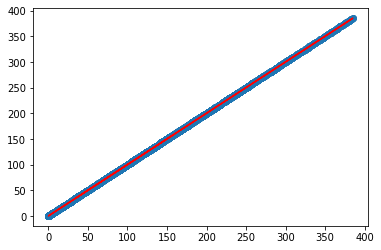

In [ ]:
plt.scatter(LR_Result['Actual Consumption'],LR_Result['Predicted Consumption'])
plt.plot(y_test,y_test,'r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


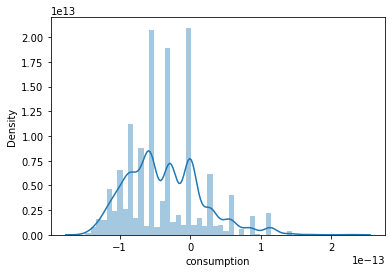

In [ ]:
sns.distplot((y_test-Y_test_predicted_LR),bins=50)  #residuals

# 7.2: RANDOM FOREST ALGORITHM

In [ ]:
# TRAINING RANDOM FOREST MODEL

from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(n_estimators=200)
RF_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
#PREDICTION

y_pred_RF = RF_model.predict(X_test)
#y_pred_RF

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print("R2 score : %f" % r2_score(y_test,y_pred_RF))

Mean Absolute Error: 0.009086877022653877
Mean Squared Error: 0.0021394171448219043
Root Mean Squared Error: 0.04625383383917386
R2 score : 1.000000


In [ ]:
# EVALUTION 

Y_train_predicted_RF = RF_model.predict(X_train)
Y_test_predicted_RF = RF_model.predict(X_test)
print("Train set accuracy of RandomForest model: ",r2_score(y_train,Y_train_predicted_RF))
print("Test set accuracy of RandomForest model: ",r2_score(y_test,Y_test_predicted_RF))

Train set accuracy of RandomForest model:  0.9999997738247808
Test set accuracy of RandomForest model:  0.9999997176533477


In [ ]:
RF_Result = pd.DataFrame({"Actual Consumption":y_test,"Predicted Consumption":Y_test_predicted_RF})
RF_Result.head()

Actual Consumption  Predicted Consumption
15553               156.0               156.0000
9282                 88.0                88.0000
23560                48.0                48.0000
7934                332.0               331.9945
19745                59.0                59.0000

# 7.3: DECISION TREE

In [ ]:
#TRAIN

from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT_model = DecisionTreeRegressor(max_depth=5)
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# PREDICT

y_pred_DT = DT_model.predict(X_test)
#y_pred_DT

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_DT))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_DT))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)))
print("R2 score : %f" % r2_score(y_test,y_pred_DT))

Mean Absolute Error: 2.613539546026612
Mean Squared Error: 10.72120451445453
Root Mean Squared Error: 3.274325047159266
R2 score : 0.998585


In [ ]:
# EVALUTION 

Y_train_predicted_DT = DT_model.predict(X_train)
Y_test_predicted_DT = DT_model.predict(X_test)
print("Train set accuracy of DecisionTree model: ",r2_score(y_train,Y_train_predicted_DT))
print("Test set accuracy of DecisionTree model: ",r2_score(y_test,Y_test_predicted_DT))

Train set accuracy of DecisionTree model:  0.9986117045366377
Test set accuracy of DecisionTree model:  0.9985850836940007


In [ ]:
DT_Result = pd.DataFrame({"Actual Consumption":y_test,"Predicted Consumption":Y_test_predicted_DT})
DT_Result.head()

Actual Consumption  Predicted Consumption
15553               156.0             153.020157
9282                 88.0              87.482765
23560                48.0              49.022286
7934                332.0             341.176536
19745                59.0              57.916808

# 7.4: KNN ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KNN_model = KNeighborsRegressor(10)
KNN_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
y_pred_KNN = KNN_model.predict(X_test)
#y_pred_KNN

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_KNN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_KNN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)))
print("R2 score : %f" % r2_score(y_test,y_pred_KNN))

Mean Absolute Error: 6.394669741100323
Mean Squared Error: 200.0174266658576
Root Mean Squared Error: 14.142751735990334
R2 score : 0.973603


In [ ]:
# EVALUTION 

Y_train_predicted_KNN = KNN_model.predict(X_train)
Y_test_predicted_KNN = KNN_model.predict(X_test)
print("Train set accuracy of DecisionTree model: ",r2_score(y_train,Y_train_predicted_KNN))
print("Test set accuracy of DecisionTree model: ",r2_score(y_test,Y_test_predicted_KNN))

Train set accuracy of DecisionTree model:  0.9801124928252776
Test set accuracy of DecisionTree model:  0.9736029736125267


In [ ]:
KNN_Result = pd.DataFrame({"Actual Consumption":y_test,"Predicted Consumption":Y_test_predicted_KNN})
KNN_Result.head()

Actual Consumption  Predicted Consumption
15553               156.0                  158.8
9282                 88.0                   87.9
23560                48.0                   43.0
7934                332.0                  322.4
19745                59.0                   28.5

# 8. COMPARISION AND CONCLUSION

In [ ]:
print('\n\nResults of Linear Regression:\n')
print("Train set accuracy of regression model: ",r2_score(y_train,Y_train_predicted_LR))
print("Test set accuracy of regression model: ",r2_score(y_test,Y_test_predicted_LR))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_LR))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred_LR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)))
print('\nConclusion: High accuracy and errors')

print('\n\nResults of Random Forest:\n')
print("Train set accuracy of RandomForest model: ",r2_score(y_train,Y_train_predicted_RF))
print("Test set accuracy of RandomForest model: ",r2_score(y_test,Y_test_predicted_RF))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print('\nConclusion: High accuracy and low errors')

print('\n\nResults of Decision Tree:\n')
print("Train set accuracy of DecisionTree model: ",r2_score(y_train,Y_train_predicted_DT))
print("Test set accuracy of DecisionTree model: ",r2_score(y_test,Y_test_predicted_DT))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_DT))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_DT))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)))
print('\nConclusion: High accuracy and errors')

print('\n\nResults of KNN:\n')
print("Train set accuracy of DecisionTree model: ",r2_score(y_train,Y_train_predicted_KNN))
print("Test set accuracy of DecisionTree model: ",r2_score(y_test,Y_test_predicted_KNN))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_KNN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_KNN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)))
print('\nConclusion: High accuracy and errors')

print('\n') 



Results of Linear Regression:

Train set accuracy of regression model:  1.0
Test set accuracy of regression model:  1.0
Mean Absolute Error: 5.267124260682613e-14
MSE:  4.1560809188529654e-27
Root Mean Squared Error: 6.446767344067075e-14

Conclusion: High accuracy and errors


Results of Random Forest:

Train set accuracy of RandomForest model:  0.9999997738247808
Test set accuracy of RandomForest model:  0.9999997176533477
Mean Absolute Error: 0.009086877022653877
Mean Squared Error: 0.0021394171448219043
Root Mean Squared Error: 0.04625383383917386

Conclusion: High accuracy and low errors


Results of Decision Tree:

Train set accuracy of DecisionTree model:  0.9986117045366377
Test set accuracy of DecisionTree model:  0.9985850836940007
Mean Absolute Error: 2.613539546026612
Mean Squared Error: 10.72120451445453
Root Mean Squared Error: 3.274325047159266

Conclusion: High accuracy and errors


Results of KNN:

Train set accuracy of DecisionTree model:  0.9801124928252776
Test se


**CONCLUSION :**

From all the above result we can conclude that the best algorithm is the Random Forest Algorithm for this project because it has higher accuracy and low Mean Absolute Error, Mean Squared Error and Root Mean Squared Error compared to other algorithm.